# CIS 419/519 Homework 1

Name: Yuchen Sun

Pennkey: yuchens

PennID: 22567060

In [13]:
import random 
import numpy as np
import pandas as pd
random.seed(42)  # don't change this line

In [14]:
# Load all data tables
baseDir = ''
df = pd.read_csv(baseDir+'hw1-NHANES-diabetes-train.csv')

# Output debugging info
print(df.shape)
df.head()


(8140, 1812)


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520,DIABETIC
0,76195,8,2,1,18,NaN,5,7,1.0,217.0,...,NaN,NaN,NaN,NaN,138.0,18.0,NaN,NaN,NaN,0
1,76958,8,2,2,57,NaN,2,2,1.0,NaN,...,NaN,135.0,115.0,67.0,150.0,45.0,NaN,NaN,NaN,0
2,80248,8,2,2,29,NaN,2,2,2.0,NaN,...,NaN,NaN,125.0,NaN,160.0,28.0,NaN,NaN,NaN,0
3,80213,8,2,2,0,5.0,1,1,2.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,76753,8,2,1,61,NaN,3,3,2.0,NaN,...,NaN,160.0,160.0,69.0,180.0,30.0,NaN,NaN,NaN,0


In [15]:
# Print information about the dataset
print('Percentage of instances with missing features:')
print(df.isnull().sum(axis=0)/df.shape[0])
print()
print('Class information:')
print(df['DIABETIC'].value_counts())
df.describe()

Percentage of instances with missing features:
SEQN        0.000000
SDDSRVYR    0.000000
RIDSTATR    0.000000
RIAGENDR    0.000000
RIDAGEYR    0.000000
              ...   
WHQ150      0.407371
WHQ030M     0.853563
WHQ500      0.853563
WHQ520      0.853563
DIABETIC    0.000000
Length: 1812, dtype: float64

Class information:
0    7447
1     693
Name: DIABETIC, dtype: int64


,SEQN,SDDSRVYR,RIDSTATR,RIAGENDR,RIDAGEYR,RIDAGEMN,RIDRETH1,RIDRETH3,RIDEXMON,RIDEXAGM,...,WHD080L,WHD110,WHD120,WHD130,WHD140,WHQ150,WHQ030M,WHQ500,WHQ520,DIABETIC
count,8140.000000,8140.0,8140.000000,8140.000000,8140.000000,519.000000,8140.000000,8140.000000,7853.000000,3359.000000,...,23.0,3358.000000,4033.000000,2202.000000,4893.000000,4824.000000,1192.000000,1192.000000,1192.000000,8140.000000
mean,78643.620270,8.0,1.964742,1.514742,31.540295,10.325626,3.093120,3.293243,1.512543,108.020244,...,40.0,412.695354,565.303992,371.082652,320.504394,516.604892,2.588087,2.303691,1.758389,0.085135
std,2944.779954,0.0,0.184443,0.499813,24.354202,6.831390,1.264086,1.617535,0.499874,69.606070,...,0.0,1509.896278,1969.887519,1708.659654,1099.580444,6886.374513,0.790769,1.225281,0.713558,0.279100
min,73557.000000,8.0,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,40.0,75.000000,55.000000,50.000000,85.000000,10.000000,1.000000,1.000000,1.000000,0.000000
25%,76088.750000,8.0,2.000000,1.000000,10.000000,5.000000,2.000000,2.000000,1.000000,46.000000,...,40.0,140.000000,125.000000,63.000000,155.000000,25.000000,3.000000,1.000000,1.000000,0.000000
50%,78643.000000,8.0,2.000000,2.000000,26.000000,9.000000,3.000000,3.000000,2.000000,104.000000,...,40.0,165.000000,148.000000,66.000000,185.000000,38.000000,3.000000,2.000000,2.000000,0.000000
75%,81201.250000,8.0,2.000000,2.000000,52.000000,16.000000,4.000000,4.000000,2.000000,167.000000,...,40.0,198.000000,179.000000,70.000000,225.000000,53.000000,3.000000,3.000000,2.000000,0.000000
max,83731.000000,8.0,2.000000,2.000000,80.000000,24.000000,5.000000,7.000000,2.000000,239.000000,...,40.0,9999.000000,9999.000000,9999.000000,9999.000000,99999.000000,9.000000,9.000000,9.000000,1.000000


## **Preprocessing**

The first key step in any data modeling task is cleaning your dataset. Explore your dataset and figure out what sort of preprocessing is required. Good preprocessing can make or break your final model. So choose wisely.

Some of the preprocessing steps that you can consider are :


*   One-hot encoding of variables
*   Missing value imputation
*   Removing outliers
*   Converting binary features into 0-1 representation


Feel free to reuse code you've already written in HW 0.






In [153]:
# TODO Insert your preprocessing code here
######################### RUN THIS BLOCK FOR TESTING MODEL 1 #################
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from scipy import stats
import math

#################### Model 1 preprocessing ######################

#Split into X,y matrices
X = df.loc[:,['RIDAGEYR','BMXWAIST','BMXHT','LBXTC','BMXLEG','BMXWT','BMXBMI','RIDRETH1','BPQ020','ALQ120Q','DMDEDUC2','RIAGENDR','INDFMPIR']]
y = df['DIABETIC']

# distinguish categorical and numeric dtypes
print(X.dtypes)

# Numeric missing value imputation
X = X.loc[:,X.isnull().mean() < .50] # drop columns with more than 50% missing percent
feature_name = X.columns
imp = SimpleImputer(missing_values=np.nan, strategy="mean") # impute the missing value with the most frequent value
X = imp.fit_transform(X)
X = pd.DataFrame(data=X, columns = feature_name) 

# Remove outlier
X = X[(np.abs(stats.zscore(X))<20).all(axis=1)] # select values that are within 20std
y = y.iloc[X.index]

# reindex X and y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)
X.head()
######################## Model 1 Preprocessing Ends#################

RIDAGEYR      int64
BMXWAIST    float64
BMXHT       float64
LBXTC       float64
BMXLEG      float64
BMXWT       float64
BMXBMI      float64
RIDRETH1      int64
BPQ020      float64
ALQ120Q     float64
DMDEDUC2    float64
RIAGENDR      int64
INDFMPIR    float64
dtype: object


,RIDAGEYR,BMXWAIST,BMXHT,LBXTC,BMXLEG,BMXWT,BMXBMI,RIDRETH1,BPQ020,DMDEDUC2,RIAGENDR,INDFMPIR
0,18.0,75.500000,171.000000,154.000000,42.000000,59.2,20.200000,5.0,2.000000,3.519663,1.0,1.52
1,57.0,90.700000,171.000000,224.000000,39.000000,61.8,21.100000,2.0,2.000000,3.000000,2.0,3.09
2,29.0,81.200000,169.000000,170.000000,40.000000,63.1,22.100000,2.0,2.000000,4.000000,2.0,5.00
3,0.0,87.271807,155.768501,179.840137,38.556413,6.8,25.684825,1.0,1.668983,3.519663,2.0,5.00
4,61.0,77.200000,174.200000,115.000000,41.500000,65.8,21.700000,3.0,1.000000,3.000000,1.0,2.13


In [16]:
######################### RUN THIS BLOCK FOR TESTING MODEL 2 #################
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from scipy import stats
import math

#################### Model 2 preprocessing ######################

#Split into X,y matrices
X = df.drop(['SEQN','SDDSRVYR','DIQ010','DIABETIC'],axis=1)
X = X.loc[:,X.isnull().mean() < .25] # drop columns with more than 25% missing percent
y = df['DIABETIC']
new_df = pd.concat([X,y],axis=1)

#select important feature using correlation function
# cor = new_df.corr()
# cor_target = abs(cor['DIABETIC'])
# important = cor_target[cor_target>0.24] # select the highly relevant features
# print(important)

# get the new X matrices based on the important features
X = df.loc[:,['RIDAGEYR','DMDHHSZE','DMDHRAGE','BMXWT','BMXBMI','BMXARMC','BMXWAIST','OHX08TC','OHX09TC','OHX13TC','DIQ050','HUQ010']]
print(X.dtypes)

#Numeric missing value imputation
feature_name = X.columns
imp = SimpleImputer(missing_values=np.nan, strategy="mean") # impute the missing value with the most frequent value
X = imp.fit_transform(X)
X = pd.DataFrame(data=X, columns = feature_name) 

# Remove outlier
X = X[(np.abs(stats.zscore(X))<25).all(axis=1)] # select values that are within 25 std
y = y.iloc[X.index]

# reindex X and y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

X.head()

######################## Model 2 Preprocessing Ends#################

RIDAGEYR      int64
DMDHHSZE      int64
DMDHRAGE      int64
BMXWT       float64
BMXBMI      float64
BMXARMC     float64
BMXWAIST    float64
OHX08TC     float64
OHX09TC     float64
OHX13TC     float64
DIQ050      float64
HUQ010        int64
dtype: object


,RIDAGEYR,DMDHHSZE,DMDHRAGE,BMXWT,BMXBMI,BMXARMC,BMXWAIST,OHX08TC,OHX09TC,OHX13TC,DIQ050,HUQ010
0,18.0,0.0,55.0,59.2,20.200000,25.5,75.500000,2.000000,2.000000,2.00000,2.000000,1.0
1,57.0,1.0,27.0,61.8,21.100000,26.3,90.700000,2.000000,2.000000,2.00000,2.000000,3.0
2,29.0,0.0,29.0,63.1,22.100000,28.0,81.200000,2.000000,2.000000,2.00000,2.000000,1.0
3,0.0,0.0,33.0,6.8,25.684825,13.9,87.271807,2.101867,2.101449,2.18102,1.978019,1.0
4,61.0,2.0,52.0,65.8,21.700000,29.6,77.200000,2.000000,4.000000,4.00000,2.000000,2.0


In [94]:
######################### RUN THIS BLOCK FOR TESTING MODEL 3 #################
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from scipy import stats
import math

#################### Model 3 preprocessing ######################

#Split into X,y matrices
X = df.drop(['DIABETIC','SEQN','DIQ010','SDDSRVYR'],axis=1)
X = X.loc[:,X.isnull().mean() < .25] # drop columns with more than 25% missing percent
y = df['DIABETIC']

# distinguish categorical and numeric dtypes
non_numeric = X.select_dtypes(include='object')
numeric = X.select_dtypes(exclude='object')

# impute categorical feature with mode
non_numeric_name = non_numeric.columns
imp = SimpleImputer(missing_values=np.nan, strategy = "most_frequent")
non_numeric = imp.fit_transform(non_numeric)
non_numeric = pd.DataFrame(data=non_numeric,columns = non_numeric_name)

# OHE the categorical feature
non_numeric_OHE = pd.get_dummies(non_numeric)

# drop the str features in the origin dataframe
for i in non_numeric.columns:
    X = X.drop([i],axis=1)
X = pd.concat([X,non_numeric_OHE],axis=1)

# Numeric missing value imputation
feature_name = X.columns
imp = SimpleImputer(missing_values=np.nan, strategy="mean") # impute the missing value with the most frequent value
X = imp.fit_transform(X)
X = pd.DataFrame(data=X, columns = feature_name) 

# Remove outlier
X = X[(np.abs(stats.zscore(X))<20).all(axis=1)] # select values that are within 20std
y = y.iloc[X.index]

# reindex X and y
X = X.reset_index(drop=True)
y = y.reset_index(drop=True)

######################## Model 3 Preprocessing Ends#################

## **Modeling**

In this section, you are tasked with building a Decision Tree classifier to predict whether or not a patient has diabetes. The overall goal of this exercise is to investigate the dataset and develop features that would improve your model performance.

To help with this process, we have provided the structure for two helper functions. These functions will help in tuning your model as well as validating your model's performance.

Complete these two functions.



In [17]:
def cross_validated_accuracy(DecisionTreeClassifier, X, y, num_trials, num_folds, random_seed):
    random.seed(random_seed)
    """
     Args:
          DecisionTreeClassifier: An Sklearn DecisionTreeClassifier (e.g., created by "tree.DecisionTreeClassifier(criterion='entropy')")
          X: Input features
          y: Labels
          num_trials: Number of trials to run of cross validation
          num_folds: Number of folds (the "k" in "k-folds")
          random_seed: Seed for uniform execution (Do not change this) 

      Returns:
          cvScore: The mean accuracy of the cross-validation experiment

      Notes:
          1. You may NOT use the cross-validation functions provided by Sklearn
    """
    



  ## TODO ##
  # loof for each trial
    accuracy = np.zeros((num_trials,num_folds)) #define a matrix to store each test's 
    rows = X.shape[0] # get the number of rows in the dataframe
    test_row = math.floor(rows/num_folds) # round down the number of test cases
    for k in range(0,num_trials):
        idx = list(range(0,rows)) #get the index of the dataframe
        random.shuffle(idx) #get the shuffle index of the dataframe
        # get the training data after shuffle
        X_backup = X.copy()
        y_backup = y.copy()
        Shuffle_X = X_backup.iloc[idx,:] 
        Shuffle_y = y_backup.iloc[idx] 
        Shuffle_X = Shuffle_X.reset_index(drop=True) # reset index
        Shuffle_y = Shuffle_y.reset_index(drop=True) # reset index
        
        for i in range(0,num_folds):
            # get the test data
            X_test = Shuffle_X.iloc[i*test_row:(i+1)*test_row,:]
            y_test = Shuffle_y.iloc[i*test_row:(i+1)*test_row]
            
            #get the training data
            test_idx = list(range(i*test_row,(i+1)*test_row))
            X_train = Shuffle_X.drop(Shuffle_X.index[test_idx],axis =0)
            y_train = Shuffle_y.drop(Shuffle_y.index[test_idx],axis=0)
            
            #Train the decision tree
            clf = DecisionTreeClassifier 
            clf = clf.fit(X_train,y_train)
            
            # Measure the test error
            y_pred = clf.predict(X_test) # give the predicted y lables
            accuracy[k][i] = (y_test == y_pred).sum() / X_test.shape[0] #store the accuracy in a single test
            
    # calculate the mean accuracy of the cross-validation experiment
    cvScore = np.mean(accuracy)
    S = np.std(accuracy)
    t = 2.626
    n = num_trials*num_folds
    upper = cvScore+t*S/np.sqrt(n)
    lower = cvScore-t*S/np.sqrt(n)
    
    
    return cvScore,upper,lower

In [18]:
def automatic_dt_pruning(DecisionTreeClassifier, X, y, num_trials, num_folds, random_seed):
    random.seed(random_seed)
    """
    Returns the pruning parameter (i.e., ccp_alpha) with the highest cross-validated accuracy

    Args:
          DecisionTreeClassifier  : An Sklearn DecisionTreeClassifier (e.g., created by "tree.DecisionTreeClassifier(criterion='entropy')")      
          X (Pandas.DataFrame)    : Input Features
          y (Pandas.Series)       : Labels
          num_trials              : Number of trials to run of cross validation
          num_folds               : Number of folds for cross validation (The "k" in "k-folds") 
          random_seed             : Seed for uniform execution (Do not change this)


      Returns:
          ccp_alpha : Tuned pruning paramter with highest cross-validated accuracy

      Notes:
          1. Don't change any other Decision Tree Classifier parameters other than ccp_alpha
          2. Use the cross_validated_accuracy function you implemented to find the cross-validated accuracy

    """


    ## TODO ##
    # get the effective alphas for the training data
    clf = DecisionTreeClassifier
    ccp_alphas = np.arange(0,1,0.02)
    params = {'ccp_alpha':ccp_alphas}
    
    # change ccp_alpha
    clfs = []
    accuracy = []
    idx = 0
    for i,j in params.items():
        for val in j:
            clf_tree = clf.set_params(**{i:val}) # set the ccp_alpha value without changing other parameter
            single_accuracy,upper,lower = cross_validated_accuracy(clf_tree,X,y,num_trials,num_folds,random_seed) # get the cross validated accuracy
            print(single_accuracy)
            accuracy.append(single_accuracy)
            if idx !=0:
                if accuracy[idx]<accuracy[idx-1]:
                    break
            idx+=1
    ccp_alpha = ccp_alphas[idx-1] # the most accurate ccp alpha
        
    return ccp_alpha

## **Tuning and Testing**

With the helper functions and your processed dataset, build a Decision Tree classifier to classify Diabetic patients and tune it to maximize model performance.

Once you are done with your modeling process, test your model on the test dataset and output your predictions in a file titled "cis519_hw1_predictions.csv", with one row per prediction.

[Text(97.62185883089685, 213.93290322580646, 'X[0] <= 39.5\nentropy = 0.42\nsamples = 8138\nvalue = [7445, 693]'),
 Text(28.889881734559793, 206.91870967741934, 'X[10] <= 1.489\nentropy = 0.08\nsamples = 5066\nvalue = [5016, 50]'),
 Text(27.95132720105125, 199.90451612903226, 'entropy = 0.0\nsamples = 15\nvalue = [0, 15]'),
 Text(29.828436268068334, 199.90451612903226, 'X[11] <= 3.5\nentropy = 0.06\nsamples = 5051\nvalue = [5016, 35]'),
 Text(16.48336399474376, 192.89032258064515, 'X[6] <= 120.9\nentropy = 0.03\nsamples = 4630\nvalue = [4616, 14]'),
 Text(6.6872010512483575, 185.87612903225806, 'X[3] <= 58.85\nentropy = 0.021\nsamples = 4530\nvalue = [4521, 9]'),
 Text(1.877109067017083, 178.86193548387098, 'X[11] <= 2.5\nentropy = 0.005\nsamples = 2701\nvalue = [2700, 1]'),
 Text(0.9385545335085415, 171.84774193548387, 'entropy = 0.0\nsamples = 2065\nvalue = [2065, 0]'),
 Text(2.8156636005256246, 171.84774193548387, 'X[4] <= 16.05\nentropy = 0.017\nsamples = 636\nvalue = [635, 1]'),
 

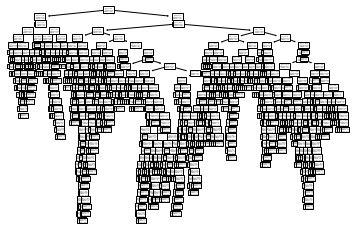

In [168]:
## TODO ##
# Unpruned Decision Tree

# Train the decision tree
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X,y)

# plot the tree
tree.plot_tree(clf)

In [19]:
# Unpruned Decision Tree cvAccuracy
Unpruned_accuracy,upper,lower = cross_validated_accuracy(tree.DecisionTreeClassifier(criterion='entropy'), X, y, 10, 10, 42)
print("The cross validated accuracy of the Unpruned Decision Tree is:")
print(Unpruned_accuracy)

# Find the best ccp_alpha value
best_ccp = automatic_dt_pruning(tree.DecisionTreeClassifier(criterion='entropy'), X, y, 10, 10, 42)

The cross validated accuracy of the Unpruned Decision Tree is:
0.897859778597786
0.8973800738007379
0.9355965559655596
0.9355965559655596
0.9148462484624846


In [8]:
print("The best ccp_alpha value is:")
print(best_ccp)

The best ccp_alpha value is:
0.04


[Text(133.92000000000002, 181.2, 'X[0] <= 39.5\nentropy = 0.42\nsamples = 8138\nvalue = [7445, 693]'),
 Text(66.96000000000001, 108.72, 'entropy = 0.08\nsamples = 5066\nvalue = [5016, 50]'),
 Text(200.88000000000002, 108.72, 'X[10] <= 1.5\nentropy = 0.74\nsamples = 3072\nvalue = [2429, 643]'),
 Text(133.92000000000002, 36.23999999999998, 'entropy = 0.0\nsamples = 169\nvalue = [0, 169]'),
 Text(267.84000000000003, 36.23999999999998, 'entropy = 0.642\nsamples = 2903\nvalue = [2429, 474]')]

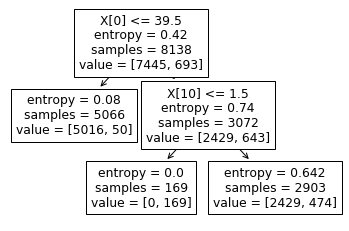

In [20]:
# Pruned Decision Tree 

# Train the decision tree and get the accuracy of pruned tree
clf_pr = tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha = best_ccp)
clf_pr = clf_pr.fit(X,y)

# plot the tree
tree.plot_tree(clf_pr)

In [160]:
# pruned DT cvAccuracy
pruned_accuracy,upper,lower = cross_validated_accuracy(tree.DecisionTreeClassifier(criterion='entropy',ccp_alpha=best_ccp), X, y, 10, 10, 42)
print(pruned_accuracy)
print(upper)
print(lower)

0.9148771498771499
0.917436236783593
0.9123180629707067


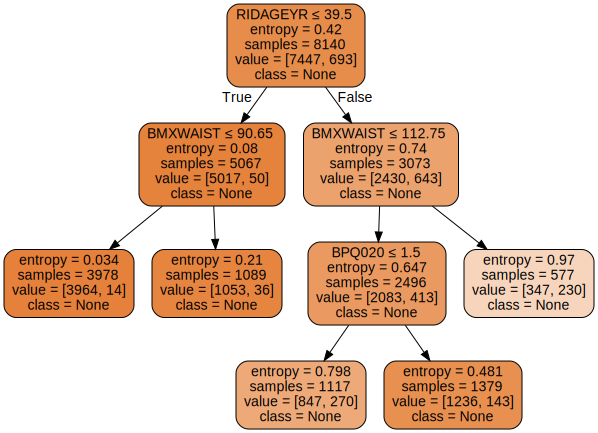

In [161]:
# visualize pruned tree
import graphviz
dot_data = tree.export_graphviz(clf_pr, out_file=None)
graph = graphviz.Source(dot_data)
graph.render("Pruned Tree")
dot_data = tree.export_graphviz(clf_pr, out_file=None, 
                     feature_names=X.columns,  
                     class_names=['None', 'Diabetes'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)
graph

In [21]:
# Predition
# Load all data tables
baseDir_pre = ''
df = pd.read_csv(baseDir_pre+'hw1-NHANES-diabetes-test-unlabeled.csv')

In [22]:
# Preprocessing
######################### RUN THIS BLOCK FOR TESTING MODEL 2 #################
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn import metrics
from sklearn import tree
from scipy import stats
import math

#################### Model 2 preprocessing ######################

#Split into X,y matrices
X = df.drop(['SEQN','SDDSRVYR','DIQ010'],axis=1)
X = X.loc[:,X.isnull().mean() < .25] # drop columns with more than 25% missing percent

#select important feature using correlation function
# cor = new_df.corr()
# cor_target = abs(cor['DIABETIC'])
# important = cor_target[cor_target>0.24] # select the highly relevant features
# print(important)

# get the new X matrices based on the important features
X = df.loc[:,['RIDAGEYR','DMDHHSZE','DMDHRAGE','BMXWT','BMXBMI','BMXARMC','BMXWAIST','OHX08TC','OHX09TC','OHX13TC','DIQ050','HUQ010']]
print(X.dtypes)

#Numeric missing value imputation
feature_name = X.columns
imp = SimpleImputer(missing_values=np.nan, strategy="mean") # impute the missing value with the most frequent value
X = imp.fit_transform(X)
X = pd.DataFrame(data=X, columns = feature_name) 

# Remove outlier
# X = X[(np.abs(stats.zscore(X))<25).all(axis=1)] # select values that are within 25 std

# reindex X and y
X = X.reset_index(drop=True)

X.head()

######################## Model 2 Preprocessing Ends#################

RIDAGEYR      int64
DMDHHSZE      int64
DMDHRAGE      int64
BMXWT       float64
BMXBMI      float64
BMXARMC     float64
BMXWAIST    float64
OHX08TC     float64
OHX09TC     float64
OHX13TC     float64
DIQ050      float64
HUQ010        int64
dtype: object


,RIDAGEYR,DMDHHSZE,DMDHRAGE,BMXWT,BMXBMI,BMXARMC,BMXWAIST,OHX08TC,OHX09TC,OHX13TC,DIQ050,HUQ010
0,12.0,0.0,36.0,76.8,26.50000,29.5,94.100000,2.000000,2.000000,2.000000,2.000000,2.0
1,0.0,0.0,20.0,8.5,25.65159,15.0,87.273025,2.108817,2.114955,2.148996,1.985075,3.0
2,21.0,0.0,21.0,77.3,23.40000,31.5,81.500000,2.000000,2.000000,2.000000,2.000000,3.0
3,11.0,0.0,42.0,67.1,24.20000,29.3,86.500000,2.000000,2.000000,2.000000,2.000000,2.0
4,6.0,0.0,58.0,17.4,14.50000,15.6,49.800000,1.000000,1.000000,1.000000,2.000000,1.0


In [23]:
# obtian DT2, MUST RUN MODEL 2 AND HELPER FUNCTION TO GET THIS
y_pre =list(clf_pr.predict(X))
y_pre = pd.DataFrame(y_pre)
print(y_pre)

      0
0     0
1     0
2     0
3     0
4     0
...  ..
2030  0
2031  0
2032  0
2033  0
2034  0

[2035 rows x 1 columns]


In [24]:
y_pre.to_csv('cis519_hw1_predictions.csv',index=False)